In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'
import numpy as np
import scipy as sp
import scipy.stats as stats
import csv
import pandas

### top-terms analysis

In [414]:
# load PubMed data & normalize by count
PM_counts_all = pandas.read_csv('./data/term_counts_pubmed.csv')
PM_counts = np.array(PM_counts_all.ix[1:, 2:])*1./np.array(PM_counts_all.ix[0, 2:])
terms = np.array(PM_counts_all.ix[1:,0])

# load CogSci data
CS_counts = np.array(pandas.read_csv('./data/term_counts_CS.csv', header=None))

# stack counts together
all_counts = np.append(CS_counts[1:]*1./CS_counts[0], PM_counts, axis=1)
columns = ['CogSci', 'PM Cogs', 'PM Neu', 'PM NeuMeth']

### term-frequency correlation
here, we plot the term-frequency between pairs of databases. Unsurprisingly, PM Neuro and PM Neuro-methods have a much tighter correlation than with either of the Cognitive databases.

(0.91212069503005644, 1.8335547819101062e-312)

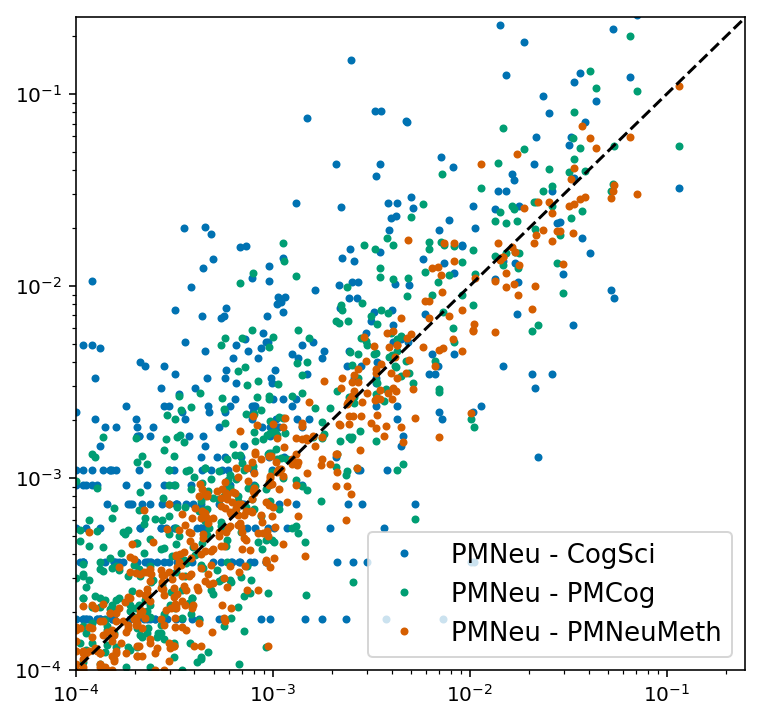

In [420]:
plt.figure(figsize=(6,6))
plt.loglog(all_counts[:,2], all_counts[:,0], '.') #PMCog vs. PMNeu
plt.loglog(all_counts[:,2], all_counts[:,1], '.')
plt.loglog(all_counts[:,2], all_counts[:,3], '.')
plt.loglog([1e-5,1.], [1e-5,1.], '--k')
plt.xlim((1e-4, 0.25))
plt.ylim((1e-4, 0.25))
plt.legend(('PMNeu - CogSci', 'PMNeu - PMCog', 'PMNeu - PMNeuMeth'), fontsize=13)

stats.pearsonr(all_counts[:,2],all_counts[:,3])

### most different terms
here, we find terms that have the highest difference in occurrence between CogSci and PM Neuro, and between PM Cog and PM Neuro

100
['activation' 'loss' 'inhibition' 'stress' 'risk' 'pain' 'localization'
 'detection' 'maintenance' 'induction' 'morphology' 'anxiety' 'monitoring'
 'sleep' 'fear']
['search' 'learning' 'language' 'action' 'concept' 'knowledge' 'context'
 'reasoning' 'judgment' 'decision' 'meaning' 'memory' 'focus' 'attention'
 'belief']
100
['activation' 'inhibition' 'induction' 'action' 'localization' 'morphology'
 'encoding' 'detection' 'integration' 'movement' 'adaptation' 'rhythm'
 'strength' 'manipulation' 'rule']
['memory' 'risk' 'attention' 'anxiety' 'association' 'learning' 'language'
 'mood' 'working memory' 'stress' 'intelligence' 'sleep' 'recall'
 'knowledge' 'cognitive development']


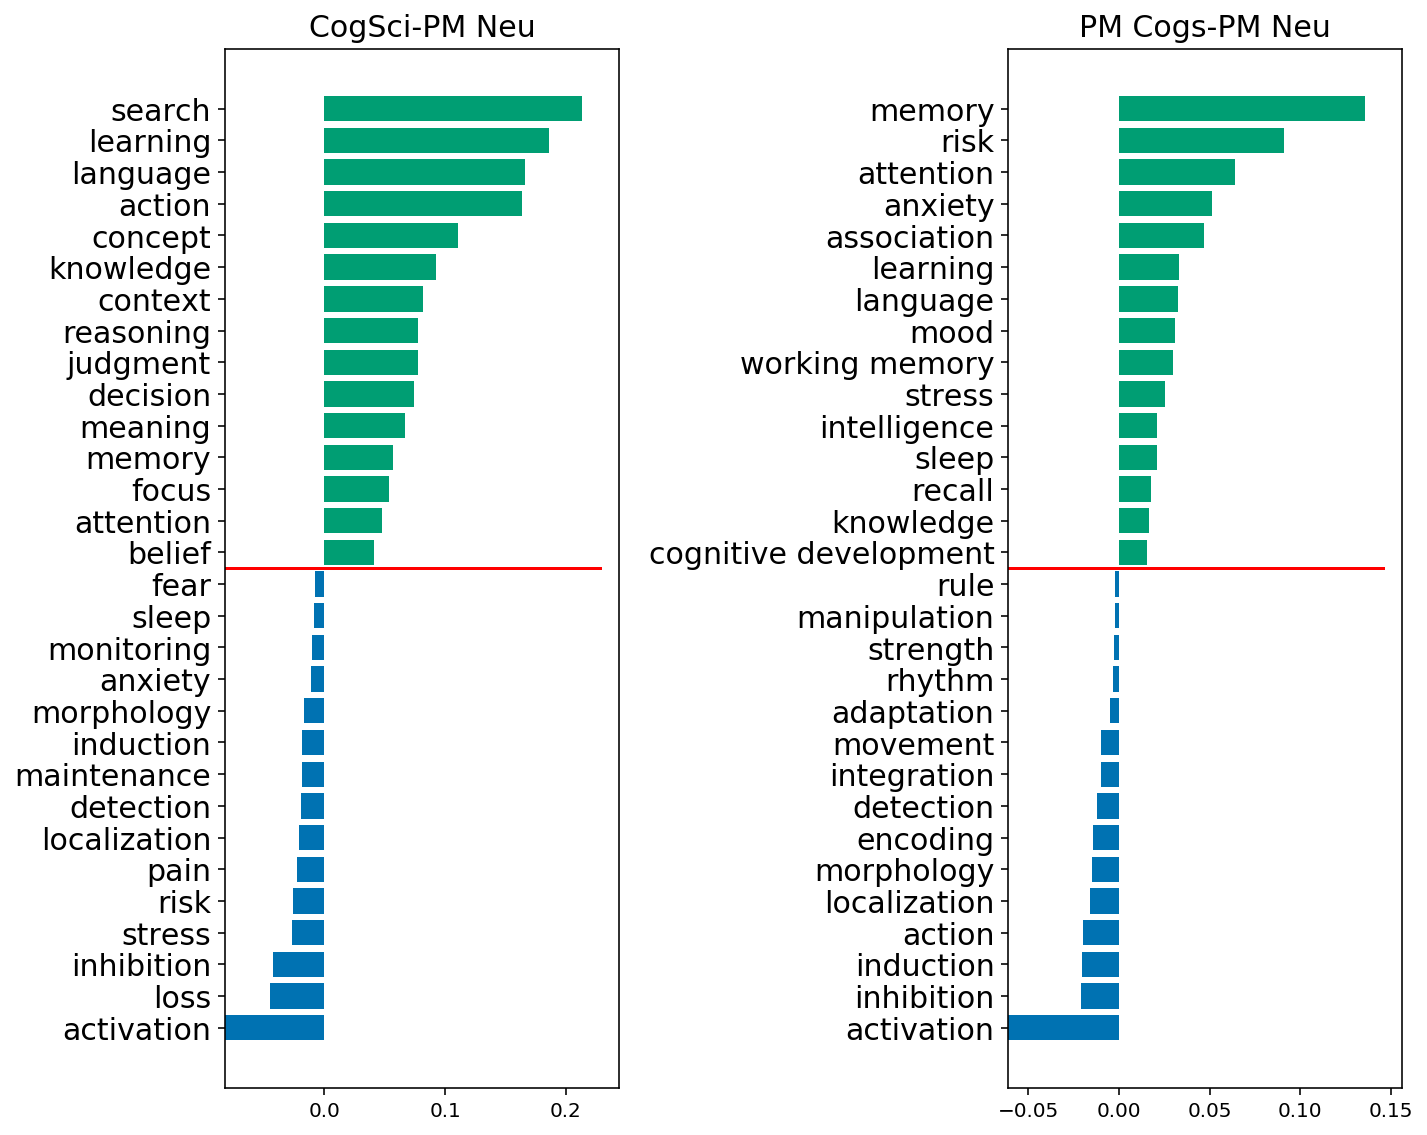

In [358]:
# term proportion difference between PMCog and PMNeuro
plt.figure(figsize=(10,8))

comps = [[0,2],[1,2]]
for i in range(2):
    plt.subplot(1,2,i+1)
    comp = comps[i]
    top_n = 15
    common_thresh = 0.005 #only include words that are in at least this proportion of entries in PM Cog
    common_idx = all_counts[:,1]>common_thresh
    common_counts = all_counts[common_idx,:]
    common_terms = terms[common_idx]
    print len(common_terms)
    termDiff = common_counts[:,comp[0]] - common_counts[:,comp[1]]


    plt.barh(range(top_n),termDiff[np.argsort(termDiff)][:top_n])
    plt.barh(range(top_n,top_n*2), termDiff[np.argsort(termDiff)][-top_n:])
    plt.title(columns[comp[0]] + '-' + columns[comp[1]], fontsize=15)
    plt.plot(plt.xlim(), [top_n-0.5]*2, 'r')
    print common_terms[np.argsort(termDiff)[:top_n]]
    print common_terms[np.argsort(termDiff)[:-(top_n+1):-1]]
    plt.yticks(range(top_n*2), np.append(common_terms[np.argsort(termDiff)[:top_n]],
        common_terms[np.argsort(termDiff)[-top_n:]]), rotation=0, fontsize=15);

plt.tight_layout()

### frequency distribution
here we plot the distribution of term frequencies in each database

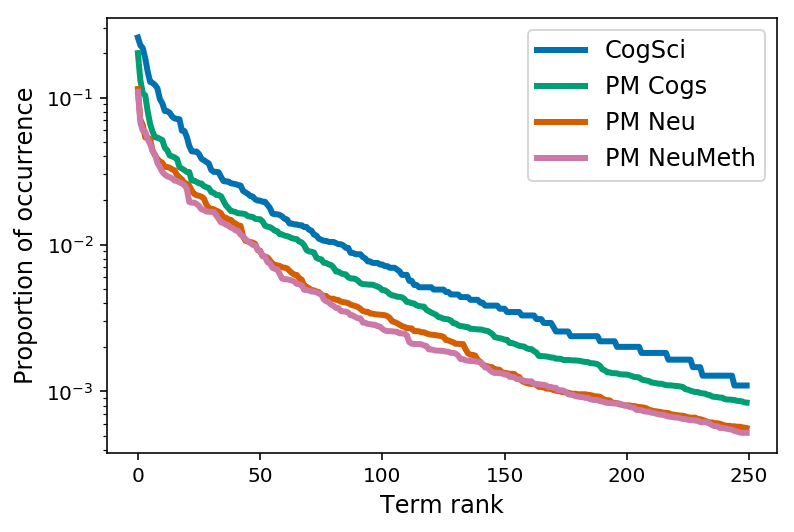

In [410]:
plt.figure(figsize=(6,4))
for i in range(4):
    plt.semilogy(np.flip(np.sort(all_counts[:,i],), -1)[:250], lw=3)

plt.legend(columns,fontsize=12)
plt.xlabel('Term rank', fontsize=12)
plt.ylabel('Proportion of occurrence',fontsize=12);

### top terms
rank the top 20 terms of every database

In [343]:
top_N = 20
top_terms = []
top_counts = []
for i in range(4):
    idx = np.flip(np.argsort(all_counts[:,i],), -1)[:top_N]
    top_terms.append(terms[idx])
    top_counts.append(all_counts[idx, i])

In [369]:
with open('./data/topterms.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(top_N):
        line = []
        for db in range(4):
            line.append(top_terms[db][i])
            line.append("%.3f" % top_counts[db][i])
        print line
        writer.writerow(line)

['learning', '0.257', 'memory', '0.201', 'activation', '0.114', 'activation', '0.110']
['search', '0.228', 'risk', '0.131', 'learning', '0.071', 'detection', '0.068']
['action', '0.218', 'attention', '0.108', 'memory', '0.065', 'memory', '0.060']
['language', '0.185', 'learning', '0.104', 'loss', '0.054', 'risk', '0.059']
['logic', '0.151', 'association', '0.081', 'action', '0.053', 'attention', '0.052']
['knowledge', '0.128', 'anxiety', '0.066', 'inhibition', '0.052', 'monitoring', '0.048']
['concept', '0.126', 'stress', '0.059', 'attention', '0.044', 'sleep', '0.043']
['memory', '0.122', 'loss', '0.054', 'risk', '0.041', 'association', '0.041']
['context', '0.116', 'activation', '0.053', 'perception', '0.038', 'movement', '0.036']
['decision', '0.098', 'knowledge', '0.052', 'detection', '0.037', 'loss', '0.034']
['attention', '0.091', 'language', '0.051', 'knowledge', '0.036', 'action', '0.031']
['reasoning', '0.081', 'context', '0.046', 'association', '0.034', 'learning', '0.030']
[

In [381]:
# we can get unique words from each database
u_terms, u_count = np.unique(top_terms[0:4], return_counts=True)
for i in range(4):
    print columns[i]
    print np.intersect1d(top_terms[i], u_terms[u_count==1])
    print '---'

CogSci
['concept' 'decision' 'goal' 'inference' 'judgment' 'logic' 'lying'
 'meaning' 'reasoning' 'search']
---
PM Cogs
['anxiety' 'mood' 'pain' 'working memory']
---
PM Neu
['encoding' 'induction' 'integration' 'thought']
---
PM NeuMeth
['localization' 'monitoring']
---


In [402]:
# or get words unique to neuro and cogs
neu_terms = np.unique(top_terms[2:])
cog_terms = np.unique(top_terms[:2])
u_terms, u_count = np.unique(np.append(neu_terms,cog_terms), return_counts=True)
for i in range(4):
    print columns[i]
    print np.intersect1d(top_terms[i], u_terms[u_count==1])
    print '---'

CogSci
['concept' 'decision' 'goal' 'inference' 'judgment' 'logic' 'lying'
 'meaning' 'reasoning' 'search']
---
PM Cogs
['anxiety' 'mood' 'pain' 'working memory']
---
PM Neu
['detection' 'encoding' 'induction' 'inhibition' 'integration' 'thought']
---
PM NeuMeth
['detection' 'inhibition' 'localization' 'monitoring']
---
